## Importando as bibliotecas

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Funcoes Utilizadas

In [61]:
#Funcao simples que mostra uma imagem na tela
def show_img(image):
    plt.figure()
    plt.imshow(image)

    

def img_to_grey(imagem):
    return cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)


def bin_otsu(imagem):
    return cv2.threshold(imagem, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

def gaussian_blur(imagem):
    value = (35, 35)
    return cv2.GaussianBlur(imagem, value, 0)

def find_contorn(img_bin):
    contours = ""
    (version, _, _) = cv2.__version__.split('.')
    if version == '3':
        image, contours, hierarchy = cv2.findContours(img_bin.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    #Estamos caindo aqui
    elif version == '2' or version == '4':
        contours, hierarchy = cv2.findContours(img_bin.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    cnt = max(contours, key = lambda x: cv2.contourArea(x))
    return cnt

def find_img_contorn(imagem, contorn):
    return cv2.drawContours(imagem.copy(), [contorn], 0, (0, 255, 0), 3)

def create_rectangle(imagem, cnt):
    x, y, w, h = cv2.boundingRect(cnt)
    return cv2.rectangle(imagem, (x,y), (x+w, y+h), (0, 0, 255), 3)

def contorn_convexo(imagem, cnt):
    hull = cv2.convexHull(cnt)
    #cv2.imwrite('res3.png', imagem)
    return cv2.drawContours(imagem, [hull], 0, (0, 0, 255), 3)

def get_centr_img(imagem, cnt):
    moments = cv2.moments(cnt)
    if(moments['m00'] != 0):
        cx = int(moments['m10'] / moments['m00'])
        cy = int(moments['m01'] / moments['m00'])

    centr = (cx, cy)
    return cv2.circle(imagem, centr, 5, [0, 0, 255], 2)

def get_img_draw(imagem):
    hull = cv2.convexHull(contorno)
    x, y, w, h = cv2.boundingRect(contorno)

    drawing = np.zeros(imagem.shape, np.uint8)
    cv2.circle(drawing, centr, 5, [0, 0, 255], 10)
    cv2.drawContours(drawing, [contorno], 0, (0, 255, 0), 2)
    cv2.drawContours(drawing, [hull], 0, (0, 0, 255), 5)
    return cv2.rectangle(drawing, (x, y), (x+w, y+h), (255, 0, 0), 2)

## Imagem de teste

### Pré-Processamento

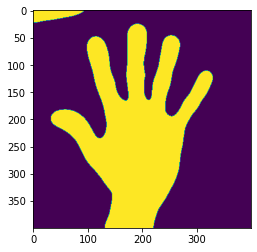

In [29]:
imagem_teste = "base1/mao5.jpg"
imagem = cv2.imread(imagem_teste)
#Aplicando binarizacao de OTSU
#_, thresh1 = cv2.theshold(grey, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

#show_img(imagem)

img_grey = img_to_grey(imagem)
#show_img(img_grey)

img_gaus = gaussian_blur(img_grey)
#show_img(img_gaus)

img_bin = bin_otsu(img_gaus)
show_img(img_bin)


### Contorno

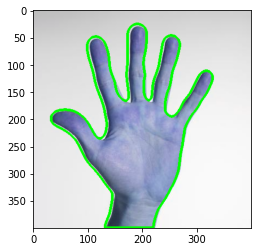

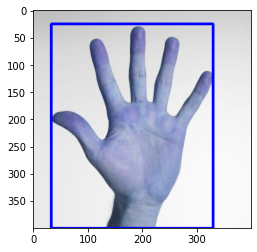

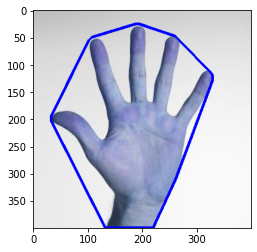

In [30]:
#Passando a imagem binarizada para encontrar o contorno
contorno = find_contorn(img_bin)

#Passando uma copia da imagem original para contornar
img_contorn = find_img_contorn(imagem.copy(), contorno)

show_img(img_contorn)

img_rect = create_rectangle(imagem.copy(), contorno)
show_img(img_rect)

img_contorn = contorn_convexo(imagem.copy(), contorno)
show_img(img_contorn)

### Centro

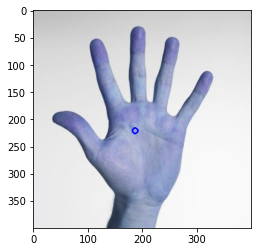

In [47]:
centr_img = get_centr_img(imagem.copy(), contorno)
show_img(centr_img)

### Visualizando

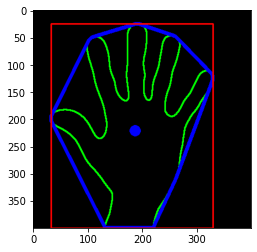

In [62]:
img_draw = get_img_draw(imagem.copy())
show_img(img_draw)